In [1]:
# Dependencies
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from modules.dataset import load_words, load_tweets
from modules.network import get_edges, get_adjacency

# Set up default colors
colors=[*mc.TABLEAU_COLORS.values()]

%matplotlib inline

In [2]:
# Load words dataset table
words = load_words('data/database/words.csv')
words.head()

,tweet,index,text,pos,conf
0,1000007326789758987,7,poor,A,0.9889
1,1000007326789758987,8,area,N,0.9991
2,1000007326789758987,13,find,V,0.9979
3,1000007326789758987,17,community,N,0.9951
4,1000007326789758987,18,provide,V,0.9899


In [3]:
# Remove words dataframe entries with text = 'woman'

words = words.drop(words[words.text == 'woman'].index).reset_index(drop=True)  
words

,conf,index,pos,text,tweet
0,0.9889,7,A,poor,1000007326789758987
1,0.9991,8,N,area,1000007326789758987
2,0.9979,13,V,find,1000007326789758987
3,0.9951,17,N,community,1000007326789758987
4,0.9899,18,V,provide,1000007326789758987
5,0.9834,21,N,orchestra,1000007326789758987
6,0.9902,26,V,join,1000007326789758987
7,0.9871,29,V,celebrate,1000007326789758987
8,0.9971,31,N,power,1000007326789758987
9,0.9899,33,N,music,1000007326789758987


In [4]:
# Load tweets dataset table
tweets = load_tweets('data/database/tweets.csv')
tweets.head()

,created_at,id_str,text,truncated,geo,coordinates,place,retweet_count,favourite_count,in_reply_to_status_id_str,in_reply_to_user_id_str,lang
0,2018-06-30 22:35:06+00:00,1013189209488797697,"#PrideMonth may be ending today, but we will c...",True,NaN,NaN,NaN,73,NaN,NaN,NaN,en
1,2018-06-30 19:35:07+00:00,1013143915308953606,“This disaster leaves us in extreme poverty......,True,NaN,NaN,NaN,28,NaN,NaN,NaN,en
2,2018-06-30 18:35:07+00:00,1013128815575470081,We want more women on ballots 🗳️ when we go ou...,True,NaN,NaN,NaN,56,NaN,NaN,NaN,en
3,2018-06-30 16:35:09+00:00,1013098625768009728,“The idea that sexism &amp; misogyny in online...,True,NaN,NaN,NaN,107,NaN,NaN,NaN,en
4,2018-06-30 15:05:12+00:00,1013075989885341697,"When women are targeted online, the abuse is m...",True,NaN,NaN,NaN,209,NaN,NaN,NaN,en


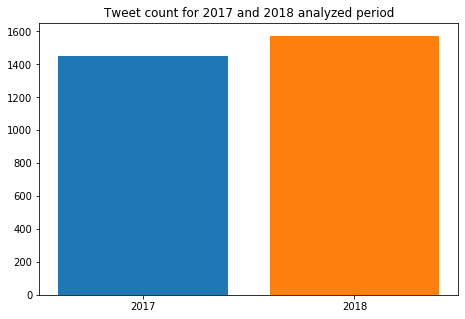

In [5]:
# Define words from tweets of 2017 and the ones from tweets of 2018
tweets_2017 = tweets.id_str[tweets.created_at.dt.year == 2017].values
tweets_2018 = tweets.id_str[tweets.created_at.dt.year == 2018].values

# Show tweets distribution
fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Tweet count for 2017 and 2018 analyzed period')
_ = ax.bar(['2017'], [len(tweets_2017)])
_ = ax.bar(['2018'], [len(tweets_2018)])
_ = plt.show()

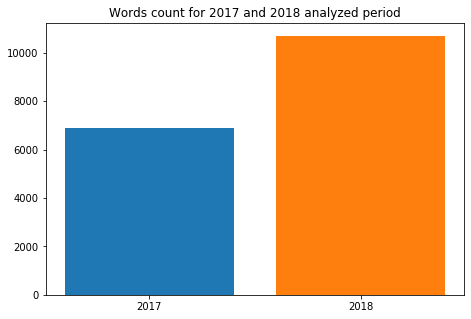

In [6]:
# Show word counts in tweets of 2017 and 2018 respectively
fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Words count for 2017 and 2018 analyzed period')
_ = ax.bar(['2017'], sum(words.tweet.isin(tweets_2017)))
_ = ax.bar(['2018'], sum(words.tweet.isin(tweets_2018)))
_ = plt.show()

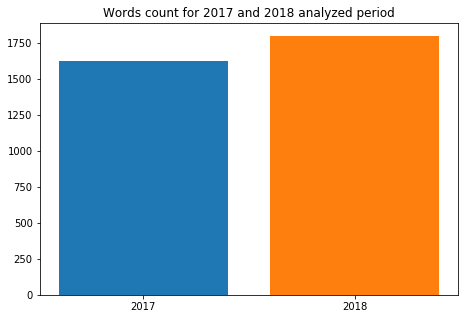

In [7]:
# Show unique word counts in tweets of 2017 and 2018 respectively

unique_words_2017 = words.text[words.tweet.isin(tweets_2017)].unique()
unique_words_2018 = words.text[words.tweet.isin(tweets_2018)].unique()

fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Words count for 2017 and 2018 analyzed period')
_ = ax.bar(['2017'], unique_words_2017.shape[0])
_ = ax.bar(['2018'], unique_words_2018.shape[0])
_ = plt.show()

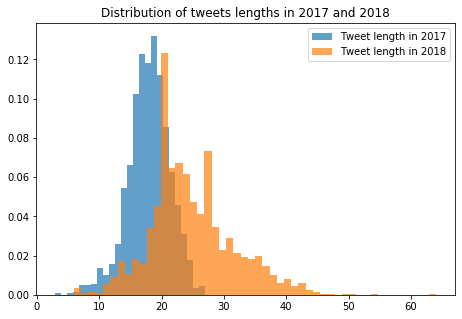

In [7]:
# Compute length of each tweet
tweets_ = tweets.loc[:, ['id_str']]
tweets_['len'] = tweets.apply(lambda t: len(t.text.split(' ')), axis=1)

# Show distribution of words number per tweet in 2017 and 2018
fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Distribution of tweets lengths in 2017 and 2018')
_ = ax.hist(tweets_[tweets_['id_str'].isin(tweets_2017)]['len'], bins=25, density=True, alpha=.7)
_ = ax.hist(tweets_[tweets_['id_str'].isin(tweets_2018)]['len'], bins=50, density=True, alpha=.7)
_ = ax.legend(['Tweet length in 2017', 'Tweet length in 2018'])
_ = plt.show()

# Network creation

## Edges creation

In [8]:
# Define edges for 2017 and 2018 words, separately
edges_2017, w2i_2017, i2w_2017 = get_edges(words[words.tweet.isin(tweets_2017)])
edges_2018, w2i_2018, i2w_2018 = get_edges(words[words.tweet.isin(tweets_2018)])

In [9]:
edges_2017.head()

,text_x,pos_x,text_y,pos_y,counts,number_x,number_y
0,19th-century,A,doctor,N,1,0,424
1,19th-century,A,woman,N,1,0,1662
2,19th-century,A,work,N,1,0,1665
3,abandon,V,become,V,1,1,130
4,abandon,V,husband,N,1,1,711


In [10]:
edges_2018.head()

,text_x,pos_x,text_y,pos_y,counts,number_x,number_y
0,21st,A,big,A,1,0,175
1,21st,A,century,N,1,0,246
2,21st,A,event,N,1,0,603
3,21st,A,happen,V,1,0,773
4,21st,A,movement,N,1,0,1092


## Adjacency matrices

Compute upper triangular adjacency matrices for either 2017's and 2018's networks. 

Note: adjacency matrices are saved by default to avoid recomputing.

In [11]:
# Comment it out to recompute adjacency matrices
"""# Retrieve adjacency matrices
X_2017 = get_adjacency(edges_2017, n=len(w2i_2017.keys()), triangular=True)
np.save('data/adj_matrix_2017.npy', X_2017)
X_2018 = get_adjacency(edges_2018, n=len(w2i_2018.keys()), triangular=True)
np.save('data/adj_matrix_2018.npy', X_2018)"""

"# Retrieve adjacency matrices\nX_2017 = get_adjacency(edges_2017, n=len(w2i_2017.keys()), triangular=True)\nnp.save('data/adj_matrix_2017.npy', X_2017)\nX_2018 = get_adjacency(edges_2018, n=len(w2i_2018.keys()), triangular=True)\nnp.save('data/adj_matrix_2018.npy', X_2018)"

In [12]:
# Load adjacency matrices
X_2017 = np.load('data/adj_matrix_2017.npy') 
X_2018 = np.load('data/adj_matrix_2018.npy') 

# Show adjacency matrices
print('Adjacency matrix for tweets in 2017')
print(X_2017, end='\n\n')
print('Adjacency matrix for tweets in 2018')
print(X_2018)

Adjacency matrix for tweets in 2017
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Adjacency matrix for tweets in 2018
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


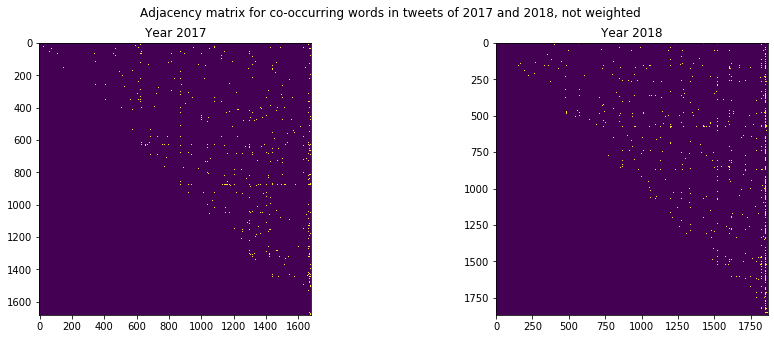

In [13]:
# Show adjacency matrices
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Adjacency matrix for co-occurring words in tweets of 2017 and 2018, not weighted')
_ = axs[0].set_title('Year 2017')
_ = axs[0].imshow(np.minimum(X_2017, np.ones(X_2017.shape)), cmap='viridis')
_ = axs[1].set_title('Year 2018')
_ = axs[1].imshow(np.minimum(X_2018, np.ones(X_2018.shape)), cmap='viridis')
_ = plt.show()

## Summary statistics

Compute mean, density, and other summary statistics for both 2017's and 2018's networks

In [14]:
# Summary statistics

# Mean
mean_2017 = X_2017.sum().sum() / (X_2017.shape[0] * (X_2017.shape[0] - 1))
mean_2018 = X_2018.sum().sum() / (X_2018.shape[0] * (X_2018.shape[0] - 1))

# Density
density_2017 = np.minimum(X_2017, np.ones(X_2017.shape)).sum().sum()
density_2017 /= (X_2017.shape[0] * (X_2017.shape[0] - 1))
density_2018 = np.minimum(X_2018, np.ones(X_2018.shape)).sum().sum()
density_2018 /= (X_2018.shape[0] * (X_2018.shape[0] - 1))

# Print out
print('Mean value of the network is {:.03f} in 2017 and {:.03f} in 2018'.format(mean_2017, mean_2018))
print('Density value of the network is {:.03f} in 2017 and {:.03f} in 2018'.format(density_2017, density_2018))

Mean value of the network is 0.005 in 2017 and 0.010 in 2018
Density value of the network is 0.004 in 2017 and 0.007 in 2018


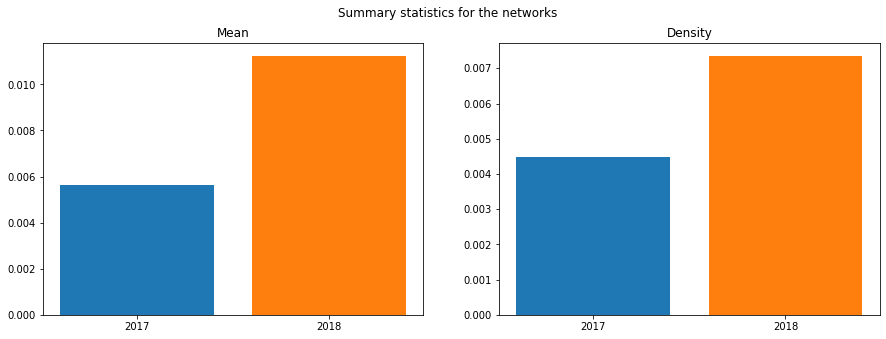

In [15]:
# Show summary statistics graphically
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Summary statistics for the networks')
_ = axs[0].set_title('Mean')
_ = axs[0].bar(['2017'], [mean_2017])
_ = axs[0].bar(['2018'], [mean_2018])
_ = axs[1].set_title('Density')
_ = axs[1].bar(['2017'], [density_2017])
_ = axs[1].bar(['2018'], [density_2018])
_ = plt.show()

## Degrees analysis

In [16]:
# Create an undirected multilink graph object
net_2017 = nx.from_numpy_matrix(X_2017, parallel_edges=True, create_using=nx.MultiGraph)
net_2018 = nx.from_numpy_matrix(X_2018, parallel_edges=True, create_using=nx.MultiGraph)

# Get degrees fore every node in every network
degrees_2017 = pd.Series({node: val for node, val in net_2017.degree()})
degrees_2018 = pd.Series({node: val for node, val in net_2018.degree()})

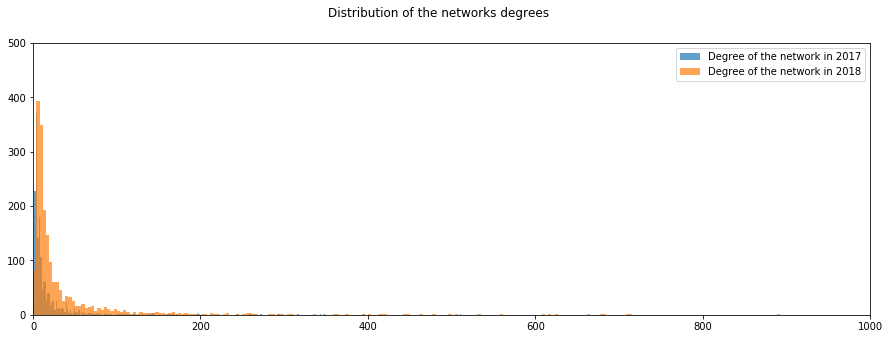

In [17]:
# Compare degrees graphically
fig, ax = plt.subplots(figsize=(15, 5))
_ = fig.suptitle('Distribution of the networks degrees')
_ = ax.hist(degrees_2017.values, bins=1000, alpha=0.7)
_ = ax.hist(degrees_2018.values, bins=1000, alpha=0.7)
_ = ax.set_ylim(0, 500)
_ = ax.set_xlim(0, 1000)
_ = ax.legend(['Degree of the network in 2017',
               'Degree of the network in 2018'])
_ = plt.show()

In [18]:
# Spot isolated nodes
isolated_2017 = degrees_2017.index[degrees_2017 == 0.0]
isolated_2018 = degrees_2018.index[degrees_2018 == 0.0]

# Print out results
print('There are {:d} isolated nodes in 2017 and {:d} in 2018'.format(len(isolated_2017), 
                                                                      len(isolated_2018)))

There are 9 isolated nodes in 2017 and 2 in 2018


In [19]:
# Remove isolated nodes from network

# Define networks
nets = [net_2017, net_2018]
# Define isolated nodes (to remove)
rm = [isolated_2017, isolated_2018]
# Loop through each isolated node and remove it
for i, net in enumerate(nets):
    # Remove isolated nodes
    for node in rm[i].values:
        net.remove_node(node)

In [21]:
# Get new node degrees
degrees = [pd.Series({node: val for node, val in net.degree()}) for net in nets]
degrees_2017 = degrees[0]
degrees_2018 = degrees[1]

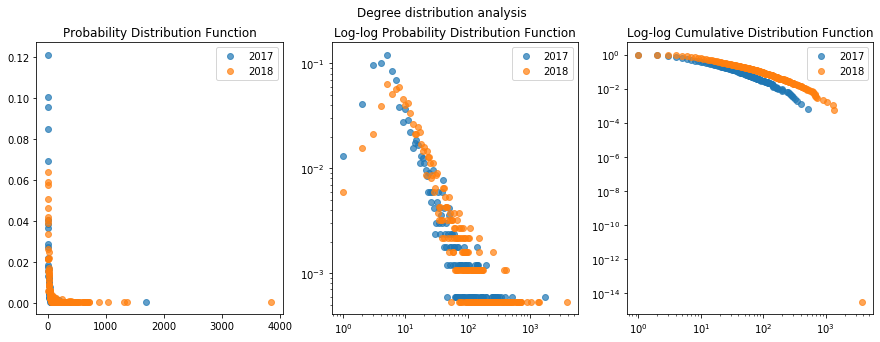

In [20]:
# Plot pdf, cdf, log-log, ... of each network

# Initialize plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
_ = fig.suptitle('Degree distribution analysis')
_ = axs[0].set_title('Probability Distribution Function')
_ = axs[1].set_title('Log-log Probability Distribution Function')
_ = axs[2].set_title('Log-log Cumulative Distribution Function')

# For each network, plot degree distribution
nets = [net_2017, net_2018]
freqs = [np.unique(degrees[i].values, return_counts=True) for i, net in enumerate(nets)] # Degrees frequencies
pdfs = [f[1] / np.sum(f[1]) for f in freqs]  # pdf of degrees
cdfs = [1 - np.cumsum(pdf) for pdf in pdfs]  # cdf of the degrees

# Create plot fore each network
for i, net in enumerate(nets):
    
    # Get values which will be plotted
    k = freqs[i][0]
    pdf = pdfs[i]
    cdf = cdfs[i]
    
    # Make plots
    _ = axs[0].plot(k, pdf, 'o', alpha=.7)
    _ = axs[1].loglog(k, pdf, 'o', alpha=.7)
    _ = axs[2].loglog(k, cdf, 'o', alpha=.7)
    
# Show plots
_ = [axs[i].legend(['2017', '2018'], loc='upper right') for i in range(3)]
_ = plt.show()

# Scale-free property

## Power law estimation

In [21]:
# Estimate power law parameters for each network

# Define saturation values (defined by looking at the graphs)
k_sat = [4, 7]
# Define parameters to be estimated
gamma, c, cutoff, k_min, k_max = [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]
# Do fo each network
for i, net in enumerate(nets):
    # Get the unique values of degree and their counts
    k = freqs[i][0]
    # Define minumum and maximum k (degree)
    k_min[i], k_max[i] = np.min(k), np.max(k)
    # Estimate parameters
    gamma[i] = 1 + degrees[i][k_sat[i]:].shape[0] / np.sum(np.log(degrees[i][k_sat[i]:] / k_sat[i]))
    c[i] = (gamma[i] - 1) * k_sat[i] ** (gamma[i] - 1)
    # Compute cutoff
    cutoff[i] = k_sat[i] * degrees[i].shape[0] ** (1 / (gamma[i] - 1))

# Print out results
print('Power law estimated parameters for 2017\'s network: gamma={:.03f}, c={:.03f}, cutoff={:.03f}'.format(
    gamma[0], c[0], cutoff[0]))
print('Power law estimated parameters for 2018\'s network: gamma={:.03f}, c={:.03f}, cutoff={:.03f}'.format(
    gamma[1], c[1], cutoff[1]))
print()

print('Minimum / maximum degree for 2017\'s network: {:d} / {:d}'.format(k_min[0], k_max[0]))
print('Minimum / maximum degree for 2018\'s network: {:d} / {:d}'.format(k_min[1], k_max[1]))

Power law estimated parameters for 2017's network: gamma=2.313, c=8.109, cutoff=1138.599
Power law estimated parameters for 2018's network: gamma=2.209, c=12.725, cutoff=3542.147

Minimum / maximum degree for 2017's network: 1 / 469
Minimum / maximum degree for 2018's network: 1 / 1243


/home/damiclem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  


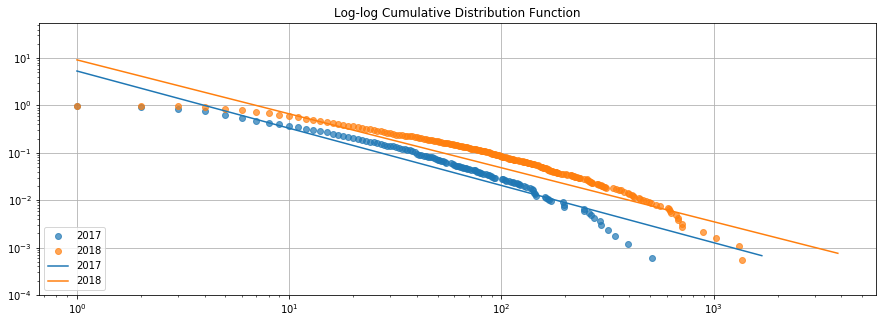

In [22]:
# Define regression lines values for either 2017 and 2018 distributions
est_2017 = c[0] * np.arange(1, np.max(freqs[0][0])) ** (1-gamma[0]) / (gamma[0] - 1)
est_2018 = c[1] * np.arange(1, np.max(freqs[1][0])) ** (1-gamma[1]) / (gamma[1] - 1)

# Show power law estimated rgeression line
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_title('Log-log Cumulative Distribution Function')
# For each network, plot either the actual cdf and the regression line
_ = ax.loglog(freqs[0][0], cdfs[0], 'o', alpha=.7, color=colors[0])
_ = ax.loglog(freqs[1][0], cdfs[1], 'o', alpha=.7, color=colors[1])
_ = ax.loglog(np.arange(1, np.max(freqs[0][0])), est_2017, color=colors[0])
_ = ax.loglog(np.arange(1, np.max(freqs[1][0])), est_2018, color=colors[1])
_ = ax.legend(['2017', '2018', '2017', '2018'], loc='lower left')
_ = ax.set_ylim(1e-04, 0)  # Note that this removes an outlier
_ = ax.grid()
_ = plt.show()

# Small-world property

## Connected components

In [50]:
"""# Extract cardinality of connected components and diameter of the giant component for both nets

# Initialize components container
connected_components = {'2017': [], '2018': []}
k = [*connected_components.keys()]

# Compute giant component for every network
for i, net in enumerate(nets):
    # Compute connected component
    cc = sorted(nx.connected_components(net), key=len, reverse=True)        
    # Compute diameter of the giant component
    d = nx.diameter(net.subgraph(cc[0]))
    # Store the tuple (giant component, cardinality, diameter)
    connected_components[k[i]].append({
        'components': cc[0],
        'size': len(cc[0]),
        'diameter': d
    })
    # Store each component
    for components in cc[1:]:
        # Add component, without diameter
        connected_components[k[i]].append({
            'components': components,
            'size': len(components)
        })

# Save connected components to disk
np.save('data/connected_components.npy', connected_components)"""

In [51]:
# Load connected components from file
connected_components = np.load('data/connected_components.npy', allow_pickle=True).item()
k = [*connected_components.keys()]

# Show connected components info for each year
for i, net in enumerate(nets):
    # Retrieve connected component
    cc = connected_components[k[i]]
    # Show giant component info
    print('Network {:s}'.format(k[i]))
    print('Giant component has cardinality={:d} and diameter={:d}'.format(cc[0]['size'], cc[0]['diameter']))
    # Store each component
    for j, component in enumerate(cc):
          if j == 0: continue
          # Show other components
          print('Connected component nr {:d} has cardinality={:d}'.format(j + 2, component['size']))
    print()

Network 2017
Giant component has cardinality=1665 and diameter=6
Connected component nr 3 has cardinality=4
Connected component nr 4 has cardinality=2
Connected component nr 5 has cardinality=2

Network 2018
Giant component has cardinality=1861 and diameter=5
Connected component nr 3 has cardinality=2
Connected component nr 4 has cardinality=2



## Clustering coefficient

In [58]:
# Convert the multigraph into a weighted graph

# Get edge lists
edges = {'2017': edges_2017, '2018': edges_2018}
wnets = {}

# Create new weighted graph
for k in edges.keys():
    wnets[k] = nx.from_pandas_edgelist(edges[k], source='number_x', target='number_y', edge_attr='counts')

# Compute clustering coefficients
ccoef_2017 = pd.Series(nx.clustering(wnets['2017'], weight='counts')).reset_index()
ccoef_2018 = pd.Series(nx.clustering(wnets['2018'], weight='counts')).reset_index()

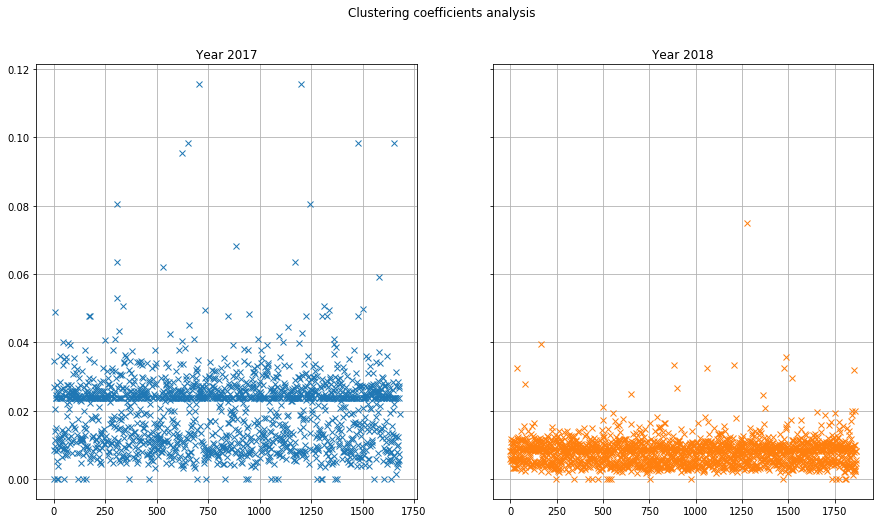

In [59]:
# Make plot
fig, axs = plt.subplots(1, 2, figsize=(15, 8),sharey=True)
_ = fig.suptitle('Clustering coefficients analysis')
_ = axs[0].set_title('Year 2017')
_ = axs[0].plot(ccoef_2017['index'].values, ccoef_2017[0].values, 'x', mec=colors[0])
_ = axs[0].grid()
_ = axs[1].set_title('Year 2018')
_ = axs[1].plot(ccoef_2018['index'].values, ccoef_2018[0].values, 'x', mec=colors[1])
_ = axs[1].grid()
_ = plt.show()

## Small world coefficients

In [ ]:
# Compute small-world coefficients on giant components
small_world = {}

# Compute sigma and omega for giant component in each network
for k in wnets.keys():
    print('Network {:s}:'.format(k), end=' ')
    # Get giant component
    giant_component = connected_components[k][0]['components']
    # Compote subgraph using giant component
    subgraph = wnets[k].subgraph(giant_component)
    # Compute sigma and omega
    small_world[k]['sigma'] = nx.sigma(subgraph)
    print('sigma={:f}'.format(small_world[k]['sigma']), end=', ')
    small_world[k]['omega'] = nx.omega(subgraph)
    print('omega={:f}'.format(small_world[k]['omega']), end='\n')

# Ranking

## Ranking by degree

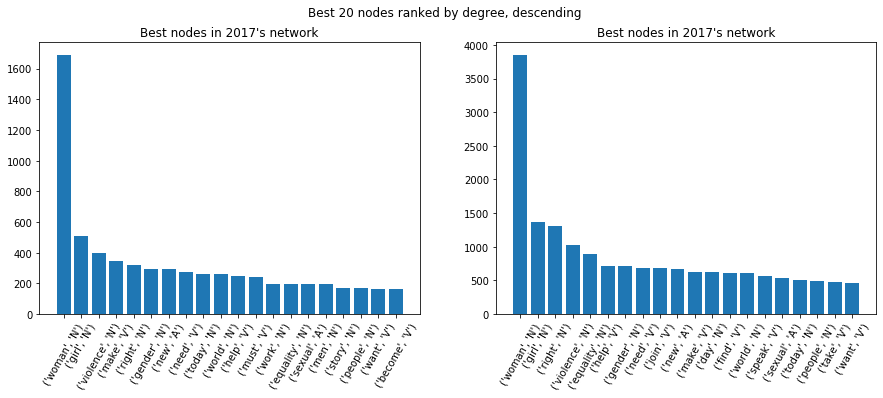

In [61]:
# Sort nodes by degree, descending
degrees_2017 = degrees[0].sort_values(ascending=False)
degrees_2018 = degrees[1].sort_values(ascending=False)

# Define subset (firs n-th)
best = 20

# Make plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Best 20 nodes ranked by degree, descending')
_ = axs[0].set_title('Best nodes in 2017\'s network')
_ = axs[0].bar(degrees_2017.index[:best].map(lambda x: str(i2w_2017[x])), degrees_2017.values[:best])
_ = axs[0].tick_params(axis='x', labelrotation=60)
_ = axs[1].set_title('Best nodes in 2017\'s network')
_ = axs[1].bar(degrees_2018.index[:best].map(lambda x: str(i2w_2018[x])), degrees_2018.values[:best])
_ = axs[1].tick_params(axis='x', labelrotation=60)
_ = plt.show()

## Ranking by betweenness

In [72]:
"""# Compute betweenness centrality measure for nodes (on giant components)

betweenness = {}

for k in wnets.keys():
    giant_component = connected_components[k][0]['components']
    subgraph = wnets[k].subgraph(giant_component)
    betweenness[k] = nx.betweenness_centrality(subgraph)
    
# Save betweenness as numpy array
np.save('data/betweenness.npy', betweenness)"""

In [73]:
# Load betweenness
betweenness = np.load('data/betweenness.npy', allow_pickle=True).item()

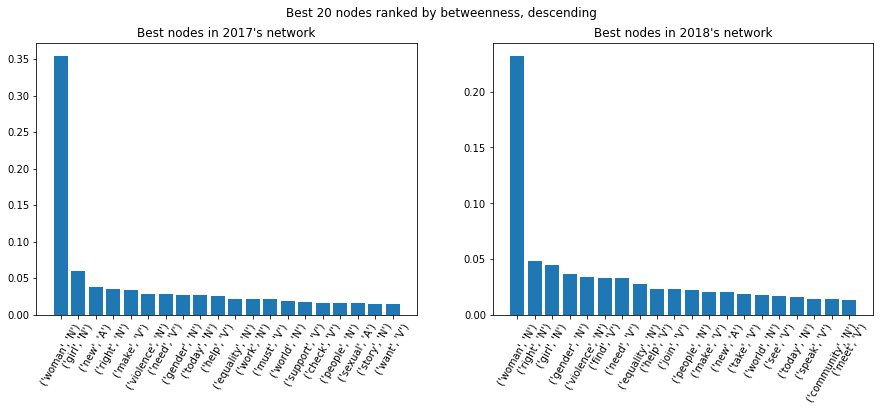

In [77]:
# Define subset (firs n-th)
best = 20

# Get betweenness
btw_2017 = pd.Series(betweenness['2017']).sort_values(ascending=False)
btw_2018 = pd.Series(betweenness['2018']).sort_values(ascending=False)

# Make plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Best 20 nodes ranked by betweenness, descending')
_ = axs[0].set_title('Best nodes in 2017\'s network')
_ = axs[0].bar(btw_2017.index[:best].map(lambda x: str(i2w_2017[x])), btw_2017.values[:best])
_ = axs[0].tick_params(axis='x', labelrotation=60)
_ = axs[1].set_title('Best nodes in 2018\'s network')
_ = axs[1].bar(btw_2018.index[:best].map(lambda x: str(i2w_2018[x])), btw_2018.values[:best])
_ = axs[1].tick_params(axis='x', labelrotation=60)
_ = plt.show()